In [1]:
from typing import List
import pickle
import numpy as np


In [20]:
# 读取pickle文件
# with open("guacamol_总训练数据集.pickle", 'rb') as file:
#     loaded_data = pickle.load(file)
# print(len(loaded_data))
smiles = []
with open("MET_10000.txt","r") as f:
    for i in f:
        smiles.append(i.strip())

In [21]:
class RandomSmilesSampler():
    """
    Generator that samples SMILES strings from a predefined list.
    """

    def __init__(self, molecules: List[str]) -> None:
        """
        Args:
            molecules: list of molecules from which the samples will be drawn
        """
        self.molecules = molecules

    def generate(self, number_samples: int) -> List[str]:
        return list(np.random.choice(self.molecules, size=number_samples))

In [22]:
generator = RandomSmilesSampler(smiles)


In [26]:
sam  = generator.generate(500)

In [27]:
print(len(sam))


500


In [28]:
with open("random_MET_500.smi", 'w') as file:
    for item in sam:
        file.write(f'{item}\n')

In [ ]:
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from tqdm import tqdm

import csv

# 读取txt文件中的SMILES字符串
def read_smiles_from_txt(filename):
    smiles_list = []
    with open(filename, 'r') as file:
        for line in file:
            smiles_list.append(line.strip())
    return smiles_list

# 计算分子量和重原子数量
def calculate_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    
    mol = Chem.AddHs(mol)
    AllChem.EmbedMolecule(mol)
    AllChem.MMFFOptimizeMolecule(mol)
    volume = AllChem.ComputeMolVolume(mol)
    
    return volume

# 保存结果到CSV文件
def save_to_csv(data, filename):
    with open(filename, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['SMILES', 'volume'])
        writer.writerows(data)

if __name__ == "__main__":
    # 从txt文件中读取SMILES字符串
    smiles_list = read_smiles_from_txt("random_16W_sampler.smi")

    # 计算分子量和SA分数
    results = []
    for smiles in tqdm(smiles_list):
        try:
            volume = calculate_descriptors(smiles)
            results.append([smiles, volume])
        except Exception as e:
            pass

    # 保存结果到CSV文件
    save_to_csv(results, "16w_volume.csv")
    print("done!")

  1%|▍                                                                         | 885/160000 [05:36<17:42:48,  2.50it/s]

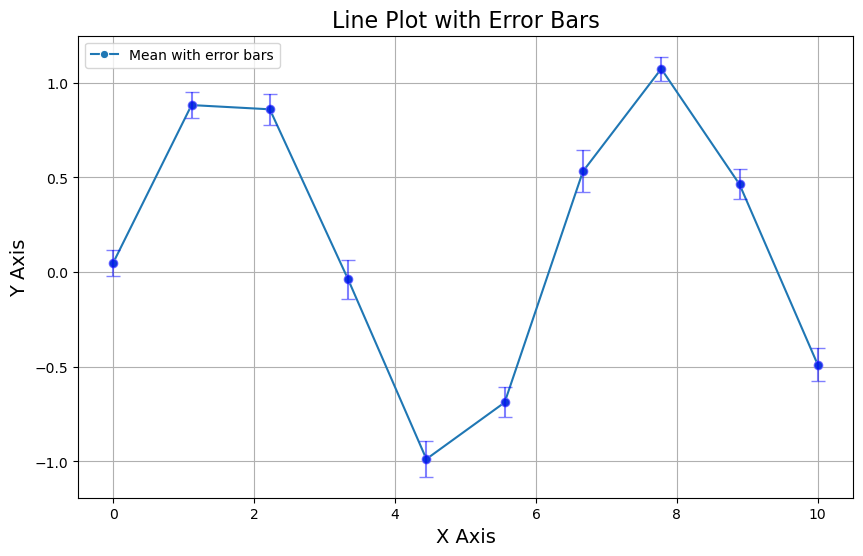

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 生成示例数据
np.random.seed(42)
x = np.linspace(0, 10, 10) # x为从0到10等间隔的10个点。
y = np.sin(x) + np.random.normal(0, 0.1, 10) # y为添加了高斯噪声的sin函数。

yerr = np.random.uniform(0.05, 0.15, size=y.shape)  # yerr为随机生成的误差数据，范围在0.05到0.15之间。

# 创建一个DataFrame来存储数据
data = pd.DataFrame({'x': x, 'y': y})

# 使用Seaborn绘制带有误差条的折线图
plt.figure(figsize=(10, 6))
# 绘制折线图，设置marker='o'以在每个数据点上添加标记。
sns.lineplot(data=data, x='x', y='y', marker='o', label='Mean with error bars')

# 使用Matplotlib的errorbar函数手动添加误差条
'''
fmt='o'表示使用圆点标记数据点。
color='b'表示误差条的颜色为蓝色。
alpha=0.5设置误差条的透明度。
capsize=5设置误差条端点的宽度。
'''
plt.errorbar(x, y, yerr=yerr, fmt='o', color='b', alpha=0.5, capsize=5)

# 添加标签和标题
plt.xlabel('X Axis', fontsize=14)
plt.ylabel('Y Axis', fontsize=14)
plt.title('Line Plot with Error Bars', fontsize=16)
plt.legend()
plt.grid(True)

# 显示图表
plt.show()
